# Case Study -- Lead Scoring 

Build a logistic Regression Model to assign lead score to each leads, such that the lead that has a lead score higher has higher conversion rate , lower the lead score low is the conversion rate
And the target conversion rate must be 80 percent

# Importing Important Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


#  Importing the data

In [2]:
lead_data = pd.read_csv("Leads.csv")

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2 : Understanding the data

In [5]:
print("Total rows in given data set are ",lead_data.shape[0])
     
print("Total columns in given data set are",lead_data.shape[1])

Total rows in given data set are  9240
Total columns in given data set are 37


In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning

In [7]:
# From observing the columns we can drop column lead Number as these doesnot help in building the model

# From observing the columns we can further understand that the data we got is from 
    # 1. Data directly from the form (online websites,google etc)
    # 2. Data updated by sales team after interacting with the student

# As the model building is to be based on data collected from the student online we can drop features that are
# updated by the sales team in the data

# On data understanding we can understand that the features updated by sales team are:

# Last activity
# Last notable activity
# Lead profile
# Tags
# Lead quality
# Asymmetrique Activity Index
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score

# We can drop these features as these features are not revelant for model builiding


In [8]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Dropping irrelevant columns

lead_data = lead_data.drop(['Lead Number','Last Activity','Last Notable Activity',
                           'Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
                           'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [10]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        6779 

In [11]:
# After dropping irrelevant columns we are left with 27 features

In [12]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [13]:
# Understanding Numerical Features

# We understand that the features Converted , TotalVisits, Total Time Spent on Website, Page Views Per Visit  
# are numeric features 

# We observe that TotalVisits and Page Views Per Visit have few NAs

# only feature where there is huge difference in mean and median is Total Time Spent on Website and we can observe that 
# as mean is greater than median it is right skewed and it is affected by extreme high values

In [14]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,Select,Select,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,Select,Select,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,Select,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,Select,Mumbai,No,No


In [15]:
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [16]:
# UNDERSTANDING THE CATEGORICAL DATA

col = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

for i in col:
    print(lead_data[i].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
S

In [17]:
# In few columns we observe that there is a value 'Select' 
# We can understand that this 'Select' is obtained as the lead didnt opt for any option
# So we can consider this value 'Select' as NA

# So we need to replace 'Select' with NA

In [18]:
lead_data = lead_data.replace("Select", np.nan)

In [19]:
# Understanding the percentage of missing terms in each feature

lead_data.isna().sum() *100/lead_data.shape[0]

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [20]:
# We observe that the percentage of missing values in few features  is above the threshold level of 40 percent 
# So no need to drop any features based on having greater percentage of missing values

# Features to be dropped are:

# How did you hear about X Education
# Lead Profile
# City 

In [21]:
lead_data = lead_data.drop(['How did you hear about X Education','Lead Profile','City'],axis=1)

In [22]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,No,No,No,No


In [23]:
# UNDERSTANDING THE CATEGORICAL DATA

col = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Country', 'Specialization','What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

for i in col:
    print(lead_data[i].value_counts(normalize = True,dropna=False))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.

In [24]:
# Observing the categorical data features we observe that few features are heavily skewed where the feature has more than 
# 99 Percent data as one value



In [25]:
# We can drop such features as these features doesnot cover the  variance of the data and doesnot help much in model building

# These features are : 

# Do Not Call
# Receive More updates About Our Courses 
# Update me on Supply Chain Content
# Get updates on DM Content
# I agree to pay the amount through cheque


# We DONOT drop the features search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement
# Through Recommendations as these are dummies created for the feature
#'Indicating whether the customer had seen the ad in any of the listed items'

In [26]:
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [27]:
# Dropping heavily skewed features 

lead_data = lead_data.drop(['Do Not Call','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                           'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)


In [28]:
col = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Country', 'Specialization','What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']
for i in col:
    print(lead_data[i].value_counts(normalize = True,dropna=False))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
India                   0

In [29]:
# We can observe in feature Lead Source Google appeared twice as google and it is read as other value
# so replace google with Google

In [30]:
lead_data['Lead Source'] =lead_data["Lead Source"].replace("google","Google")

In [31]:
lead_data.shape

(9240, 20)

In [32]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [33]:
lead_data.isna().sum()/lead_data.shape[0]

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

# Handling Missing Values

In [34]:
# The following feature have missing values which are to be imputed

# Lead Source
# Country
# Specialization
# What is your current occupation
# What matters most to you in choosing a course

In [35]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
# Replacing the Lead score missing value with mode Google

lead_data['Lead Source'].mode()[0]

'Google'

In [37]:
# In the feature Lead Score there are 36 NaNs which can be repalced by mode i.e Google

lead_data ['Lead Source'] = lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0])

In [38]:
lead_data['What is your current occupation'].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
# Replacing the NAs in what is your current occupation with Unknown

lead_data['What is your current occupation'].fillna("Unknown", inplace = True)
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [40]:
lead_data['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
# Replacing the NAs in specialization feature with 'other specialization'

lead_data['Specialization'].fillna("Other Specialization", inplace = True)
lead_data['Specialization'].value_counts()

Other Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [42]:
#Feature -What matters most to you in choosing a course
lead_data['What matters most to you in choosing a course'].value_counts(dropna = False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# We can drop this feature as most of the value is Better Career Prospects and next is NAN
# Even if we replace with Mode it is Better Career Prospects and more than 99% data will have one value 
# and it doesnot explain the variance 

In [44]:
lead_data = lead_data.drop(['What matters most to you in choosing a course'],axis=1)

In [45]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Country                                 6779 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [46]:
lead_data['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [47]:
# Replace nan in Country feature with unknown

lead_data['Country'].fillna("unknown", inplace = True)
lead_data['Country'].value_counts()

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [48]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [49]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,unknown,Other Specialization,Unemployed,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No


In [50]:
col = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Country', 'Specialization','What is your current occupation',
       'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']

for i in col:
    print(lead_data[i].value_counts(normalize = False,dropna=False))

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom           

In [51]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [52]:
# Imputing Missing Values in numeric variable

lead_data[['TotalVisits','Page Views Per Visit']] = lead_data[['TotalVisits','Page Views Per Visit']].fillna(lead_data[['TotalVisits','Page Views Per Visit']].median())

In [53]:
# Treating Outliers in numeric data

# Checking for outliers in the continuous variables
numeric_features = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

numeric_features.describe(percentiles=[.25, .5, .75, .90, .95, .99,.999,.9999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [54]:
# Treating outliers in Total Visits

lead_data=lead_data[~(lead_data["TotalVisits"]>32)]

In [55]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,unknown,Other Specialization,Unemployed,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No


In [56]:
# Converting yes to 1 and no to 0 in few categorical variables

# List of variables to map

varlist =  ['Do Not Email',"Search",'Magazine',"Newspaper Article","X Education Forums",'Newspaper',"Digital Advertisement","Through Recommendations",'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [57]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,unknown,Other Specialization,Unemployed,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Other Specialization,Unemployed,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Other Specialization,Unemployed,0,0,0,0,0,0,0,0


In [58]:
# Creating Dummies for categorical varaiable with mutliple levels

In [59]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Country', 'Specialization','What is your current occupation',]], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [60]:
lead_data.shape

(9231, 103)

In [61]:
# Dropping the features for which few dummy variables are created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Country', 'Specialization','What is your current occupation'], 1)

In [62]:
lead_data.shape

(9231, 98)

# Model Building

# Splitting the data to train and test

In [63]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
9133,0,-0.982957,-0.879983,-1.125200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5234,0,-0.391572,-0.110255,-0.166669,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4067,0,-0.095879,-0.500591,0.312597,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
712,0,-0.687264,-0.604559,-0.645934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6680,0,2.861046,-0.484175,0.950020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Model Building:

# Model 1

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           90
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Oct 2022   Deviance:                   2.0613e+05
Time:                        20:02:01   Pearson chi2:                 1.01e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.398e+15   6.69e+07  -3.58e+07      0.000    -2.4e+15    -2.4e+15
Do Not Email                                         -9.074e+14   3.16e+06  -2.87e+08      0.000   -9.07e+14   -9.07e+14
TotalVisits                                          -1.888e+14    1.2e+06  -1.57e+08      0.000   -1.89e+14   -1.89e+14
Total Time Spent on Website                           3.422e+14   9.58e+05   3.57e+08      0.000    3.42e+14    3.42e+14
Page Views Per Visit                                  1.162e+14   1.34e+06    8.7e+07      0.000    1.16e+14    1.16e+14
Search                                                6.407e+13   2.23e+07   2.88e+06      0.000    6.41e+13    6.41e+13
Magazine                                              -661.8880   3.08e-06  -2.15e+08      0.000    -661.888    -661.888
Newspaper Article                                    -1.089e+14   6.73e+07  -1.62e+06      0.000   -1.09e+14   -1.09e+14
X Education Forums                                    1.152e+15   1.08e+08   1.06e+07      0.000    1.15e+15    1.15e+15
Newspaper                                            -6.545e+16   6.73e+07  -9.73e+08      0.000   -6.54e+16   -6.54e+16
Digital Advertisement                                -3.008e+14   3.89e+07  -7.73e+06      0.000   -3.01e+14   -3.01e+14
Through Recommendations                              -5.894e+13   3.14e+07  -1.88e+06      0.000   -5.89e+13   -5.89e+13
A free copy of Mastering The Interview               -1.797e+14   2.76e+06  -6.52e+07      0.000    -1.8e+14    -1.8e+14
Lead Origin_Landing Page Submission                  -2.008e+14   3.41e+06  -5.89e+07      0.000   -2.01e+14   -2.01e+14
Lead Origin_Lead Add Form                             8.775e+14   1.39e+07   6.32e+07      0.000    8.78e+14    8.78e+14
Lead Origin_Lead Import                               8.255e+14   7.08e+07   1.17e+07      0.000    8.25e+14    8.25e+14
Lead Origin_Quick Add Form                            4.913e+15   6.81e+07   7.21e+07      0.000    4.91e+15    4.91e+15
Lead Source_Direct Traffic                            7.637e+14   3.61e+07   2.12e+07      0.000    7.64e+14    7.64e+14
Lead Source_Facebook                                 -7.359e+14   7.84e+07  -9.39e+06      0.000   -7.36e+14   -7.36e+14
Lead Source_Google                                    6.043e+14   3.59e+07   1.68e+07      0.000    6.04e+14    6.04e+14
Lead Source_Live Chat                                 6.428e+15   7.51e+07   8.56e+07      0.000    6.43e+15    6.43e+15
Lead Source_NC_EDM                                    3.331e+15   7.61e+07   4.38e+07      0.000    3.33e+15    3.33e+15
Lead Source_Olark Chat                                 6.3

In [69]:
# As there are many features we start feature selection with RFE

# Feature Selection 

In [70]:
# Feature Selection Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 56),
 ('Search', False, 48),
 ('Magazine', False, 82),
 ('Newspaper Article', False, 22),
 ('X Education Forums', False, 34),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 41),
 ('Through Recommendations', False, 38),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Origin_Quick Add Form', False, 76),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 75),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', False, 74),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', False, 7

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Country_Qatar', 'Country_Saudi Arabia', 'Country_unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

# Assesing the model with Statsmodels

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.8
Date:                Tue, 18 Oct 2022   Deviance:                       5723.6
Time:                        20:02:08   Pearson chi2:                 6.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3601
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7255      0.045    -16.208      0.000      -0.813      -0.638
Do Not Email                                            -1.3435      0.157     -8.537      0.000      -1.652      -1.035
Total Time Spent on Website                              1.1456      0.039     29.146      0.000       1.069       1.223
Lead Origin_Lead Add Form                                2.4178      0.188     12.846      0.000       2.049       2.787
Lead Source_Welingak Website                             2.2187      0.739      3.002      0.003       0.770       3.668
Country_Qatar                                          -23.9142   2.67e+04     -0.001      0.999   -5.23e+04    5.22e+04
Country_Saudi Arabia                                    -1.4974      0.762     -1.965      0.049      -2.991      -0.004
Country_unknown                                          1.0277      0.095     10.764      0.000       0.841       1.215
What is your current occupation_Housewife               23.4261   2.55e+04      0.001      0.999      -5e+04       5e+04
What is your current occupation_Unknown                 -1.4088      0.084    -16.673      0.000      -1.574      -1.243
What is your current occupation_Working Professional     2.3823      0.172     13.866      0.000       2.046       2.719
========================================================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_unknown,1.86
2,Lead Origin_Lead Add Form,1.77
3,Lead Source_Welingak Website,1.25
8,What is your current occupation_Unknown,1.22
1,Total Time Spent on Website,1.20
9,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.04
4,Country_Qatar,1.00
5,Country_Saudi Arabia,1.00
7,What is your current occupation_Housewife,1.00


In [80]:
# Droppin the feature What is your current occupation_Housewife and builidng the model

col = col.drop('What is your current occupation_Housewife')

# Model 2 : Dropping the feature 'What is your current occupation_Housewife'

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.8
Date:                Tue, 18 Oct 2022   Deviance:                       5731.7
Time:                        20:02:09   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7209      0.045    -16.134      0.000      -0.808      -0.633
Do Not Email                                            -1.3472      0.157     -8.559      0.000      -1.656      -1.039
Total Time Spent on Website                              1.1444      0.039     29.146      0.000       1.067       1.221
Lead Origin_Lead Add Form                                2.4335      0.188     12.950      0.000       2.065       2.802
Lead Source_Welingak Website                             2.2043      0.739      2.982      0.003       0.756       3.653
Country_Qatar                                          -22.9162   1.62e+04     -0.001      0.999   -3.17e+04    3.17e+04
Country_Saudi Arabia                                    -1.4991      0.762     -1.967      0.049      -2.993      -0.006
Country_unknown                                          1.0216      0.095     10.715      0.000       0.835       1.208
What is your current occupation_Unknown                 -1.4111      0.084    -16.704      0.000      -1.577      -1.245
What is your current occupation_Working Professional     2.3783      0.172     13.842      0.000       2.042       2.715
========================================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_unknown,1.86
2,Lead Origin_Lead Add Form,1.76
3,Lead Source_Welingak Website,1.25
7,What is your current occupation_Unknown,1.22
1,Total Time Spent on Website,1.20
8,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.04
4,Country_Qatar,1.00
5,Country_Saudi Arabia,1.00


In [83]:
# Dropping Country_Qatar feature

col = col.drop("Country_Qatar")

# Model 3 Droping Country_Qatar Feature and buling the model


In [84]:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.3
Date:                Tue, 18 Oct 2022   Deviance:                       5738.7
Time:                        20:02:09   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3586
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7231      0.045    -16.194      0.000      -0.811      -0.636
Do Not Email                                            -1.3459      0.157     -8.556      0.000      -1.654      -1.038
Total Time Spent on Website                              1.1419      0.039     29.128      0.000       1.065       1.219
Lead Origin_Lead Add Form                                2.4341      0.188     12.954      0.000       2.066       2.802
Lead Source_Welingak Website                             2.2042      0.739      2.982      0.003       0.755       3.653
Country_Saudi Arabia                                    -1.4948      0.762     -1.962      0.050      -2.988      -0.002
Country_unknown                                          1.0210      0.095     10.714      0.000       0.834       1.208
What is your current occupation_Unknown                 -1.4086      0.084    -16.685      0.000      -1.574      -1.243
What is your current occupation_Working Professional     2.3802      0.172     13.857      0.000       2.044       2.717
========================================================================================================================
"""

In [85]:
col = col.drop("Country_Saudi Arabia")



# Model 4: Droping Country_Saudi Arabia feature

In [86]:


X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.5
Date:                Tue, 18 Oct 2022   Deviance:                       5743.0
Time:                        20:02:09   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7262      0.045    -16.278      0.000      -0.814      -0.639
Do Not Email                                            -1.3535      0.157     -8.596      0.000      -1.662      -1.045
Total Time Spent on Website                              1.1397      0.039     29.118      0.000       1.063       1.216
Lead Origin_Lead Add Form                                2.4352      0.188     12.959      0.000       2.067       2.804
Lead Source_Welingak Website                             2.2047      0.739      2.983      0.003       0.756       3.654
Country_unknown                                          1.0224      0.095     10.732      0.000       0.836       1.209
What is your current occupation_Unknown                 -1.4077      0.084    -16.680      0.000      -1.573      -1.242
What is your current occupation_Working Professional     2.3755      0.172     13.845      0.000       2.039       2.712
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_unknown,1.86
2,Lead Origin_Lead Add Form,1.76
3,Lead Source_Welingak Website,1.25
5,What is your current occupation_Unknown,1.22
1,Total Time Spent on Website,1.20
6,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.04


In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9133    0.330330
5234    0.299052
4067    0.214725
712     0.195421
6680    0.217897
6902    0.113695
2994    0.765068
4682    0.175646
7042    0.852318
3658    0.044794
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33032975, 0.29905235, 0.21472544, 0.19542089, 0.21789696,
       0.11369497, 0.76506834, 0.1756464 , 0.85231763, 0.04479355])

In [90]:
#### Creating a dataframe with the actual lead score and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.330330,9133
1,0,0.299052,5234
2,0,0.214725,4067
3,0,0.195421,712
4,0,0.217897,6680


In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# top 5 rows
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.330330,9133,1
1,0,0.299052,5234,0
2,0,0.214725,4067,0
3,0,0.195421,712,0
4,0,0.217897,6680,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2941 1037]
 [ 406 2077]]


In [95]:
# Let's check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7766599597585513


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8364881192106323

In [98]:
# Plotting ROC Curve



In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

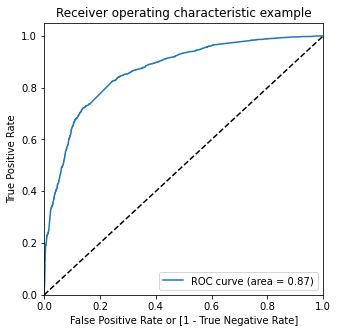

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [102]:
# Area under the ROC curve is 0.87 which is good value

In [103]:
#Finding Optimal Cutoff Point

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330330,9133,1,1,1,1,1,0,0,0,0,0,0
1,0,0.299052,5234,0,1,1,1,0,0,0,0,0,0,0
2,0,0.214725,4067,0,1,1,1,0,0,0,0,0,0,0
3,0,0.195421,712,0,1,1,0,0,0,0,0,0,0,0
4,0,0.217897,6680,0,1,1,1,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384306  1.000000  0.000000
0.1   0.1  0.536449  0.983488  0.257416
0.2   0.2  0.701749  0.909384  0.572147
0.3   0.3  0.776660  0.836488  0.739316
0.4   0.4  0.806531  0.708820  0.867521
0.5   0.5  0.804829  0.660491  0.894922
0.6   0.6  0.786566  0.582360  0.914027
0.7   0.7  0.765826  0.490536  0.937657
0.8   0.8  0.739050  0.378172  0.964304
0.9   0.9  0.690141  0.206202  0.992207


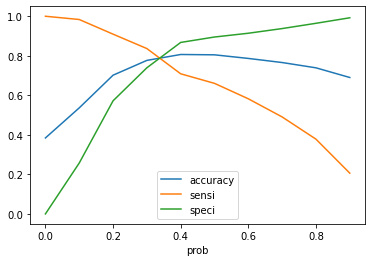

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330330,9133,1,1,1,1,1,0,0,0,0,0,0,1
1,0,0.299052,5234,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.214725,4067,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.195421,712,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.217897,6680,0,1,1,1,0,0,0,0,0,0,0,0


In [109]:
# Let's check the accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7766599597585513

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2941, 1037],
       [ 406, 2077]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8364881192106323

# Precision and Recall

In [113]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2941, 1037],
       [ 406, 2077]], dtype=int64)

In [114]:
##### Precision
# TP / TP + FP

1038.0

In [115]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6669877970456005

In [ ]:
##### Recall
#TP / TP + FN

In [116]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8364881192106323

In [338]:
# Making predictions on test data

In [339]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [340]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Country_unknown,What is your current occupation_Unknown,What is your current occupation_Working Professional
6411,0,1.469327,0,0,0,0,1
7964,0,1.354415,0,0,0,1,0
2704,0,1.516751,0,0,0,0,0
2462,0,-0.681167,0,0,0,0,0
4373,0,-0.257999,0,0,0,1,0


In [341]:
X_test_sm = sm.add_constant(X_test)

In [342]:
y_test_pred = res.predict(X_test_sm)

In [343]:
y_test_pred[:10]

6411    0.965239
7964    0.356572
2704    0.731541
2462    0.182057
4373    0.081069
6676    0.703324
9142    0.068988
5610    0.401546
1605    0.940622
6883    0.980797
dtype: float64

In [344]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6411,0.965239
7964,0.356572
2704,0.731541
2462,0.182057
4373,0.081069


In [345]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [346]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [347]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [348]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6411,0.965239
1,0,7964,0.356572
2,0,2704,0.731541
3,0,2462,0.182057
4,0,4373,0.081069


In [349]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [350]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,6411,0.965239
1,0,7964,0.356572
2,0,2704,0.731541
3,0,2462,0.182057
4,0,4373,0.081069


In [351]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [352]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,6411,0.965239,1
1,0,7964,0.356572,1
2,0,2704,0.731541,1
3,0,2462,0.182057,0
4,0,4373,0.081069,0


In [353]:
# Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7537906137184116

In [354]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1206,  487],
       [ 195,  882]], dtype=int64)

In [355]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [356]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8189415041782729

In [357]:
# 0.82 is the sensitivity achieved on the test data

In [490]:
# As accuracy is 0.75 we can conclude that the lead conversion rate is 75%

# The final Logistic Regression Model for given Case Study on Lead Score is

Target Variable = -0.7262 - 1.3535(Do Not Email) + 1.1397(Total Time Spent on    Website) + 2.4352(Lead Origin_Lead Add Form) + 2.2047(Lead Source_Welingak Website) + 1.0224 (Country_unknown) -1.4077(What is your current occupation_Unknown) + 2.3755(What is your current occupation_Working Professional)

In [358]:
# The top 3 features affecting the model are :

# Lead Origin_Lead Add Form
# What is your current occupation_Working Professional
# Lead Source_Welingak Website